In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

type(data)

sklearn.utils.Bunch

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['isBenign'] = pd.Series(data.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,isBenign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df['isBenign'].value_counts()

1    357
0    212
Name: isBenign, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,isBenign
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('isBenign', axis = 1)
y = df['isBenign']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
N, D = X_train.shape

In [9]:
N, D

(341, 30)

In [10]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
404,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.18,16.85,84.11,533.1,0.1048,0.06744,0.04921,0.04793,0.2298,0.05974
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.023690,0.1526,0.06046,...,14.06,24.34,92.82,607.3,0.1276,0.25060,0.20280,0.10530,0.3035,0.07661
264,17.19,22.07,111.60,928.3,0.09726,0.08995,0.090610,0.065270,0.1867,0.05580,...,21.58,29.33,140.50,1436.0,0.1558,0.25670,0.38890,0.19840,0.3216,0.07570
146,11.80,16.58,78.99,432.0,0.10910,0.17000,0.165900,0.074150,0.2678,0.07371,...,13.74,26.38,91.93,591.7,0.1385,0.40920,0.45040,0.18650,0.5774,0.10300
185,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,...,11.87,21.18,75.39,437.0,0.1521,0.10190,0.00692,0.01042,0.2933,0.07697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,12.70,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.024020,0.1583,0.06275,...,13.65,16.92,88.12,566.9,0.1314,0.16070,0.09385,0.08224,0.2775,0.09464
444,18.03,16.85,117.50,990.0,0.08947,0.12320,0.109000,0.062540,0.1720,0.05780,...,20.38,22.02,133.30,1292.0,0.1263,0.26660,0.42900,0.15350,0.2842,0.08225
373,20.64,17.35,134.80,1335.0,0.09446,0.10760,0.152700,0.089410,0.1571,0.05478,...,25.37,23.17,166.80,1946.0,0.1562,0.30550,0.41590,0.21120,0.2689,0.07055
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.029580,0.026470,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.1292,0.20740,0.17910,0.10700,0.3110,0.07592


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')]
)

In [13]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [14]:
model.fit(
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    epochs = 40
)

Epoch 1/40
11/11 [==============================] - 0s 13ms/step - loss: 0.2923 - accuracy: 0.9267 - val_loss: 0.1176 - val_accuracy: 0.9561
Epoch 2/40
11/11 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9560 - val_loss: 0.0743 - val_accuracy: 0.9737
Epoch 3/40
11/11 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.9853 - val_loss: 0.0767 - val_accuracy: 0.9737
Epoch 4/40
11/11 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9853 - val_loss: 0.0854 - val_accuracy: 0.9781
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.9883 - val_loss: 0.0809 - val_accuracy: 0.9781
Epoch 6/40
11/11 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9912 - val_loss: 0.0757 - val_accuracy: 0.9825
Epoch 7/40
11/11 [==============================] - 0s 4ms/step - loss: 0.0375 - accuracy: 0.9912 - val_loss: 0.0748 - val_accuracy: 0.9912
Epoch 8/40
11/11 [=

val_accuracy


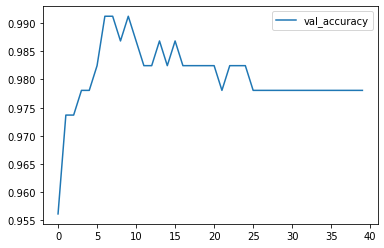

In [15]:
def plot_history_metrics(model, metrics_names = []):
    for metric_name in metrics_names:
        print(metric_name)
        plt.plot(model.history.history[metric_name], label = metric_name)
    plt.legend()


# plot_history_metrics(model, ['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plot_history_metrics(model, ['val_accuracy'])

In [16]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names = data.target_names))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

   malignant       1.00      0.94      0.97        85
      benign       0.97      1.00      0.98       143

    accuracy                           0.98       228
   macro avg       0.98      0.97      0.98       228
weighted avg       0.98      0.98      0.98       228

[[ 80   5]
 [  0 143]]
